# Clasificación por LDA en python: Caso Clasificación Deportistas  

## Contexto  
El “Maestro”, convencido de su capacidad para vislumbrar estrellas deportivas, ha puesto una
academia para ayudar a jóvenes deportistas a lograr su mayor desempeño. En esta academia, el
Maestro se enfoca particularmente en cuatro deportes: Fútbol, Basketball, Voleibol y Rugby.
Si bien ha visto que la mayoría de atletas jóvenes disfrutan practicando varios deportes, más
adelante podrían preferir especializarse en uno en particular.  
Al haber trabajado con atletas por muchos años, el Maestro ha ido recolectando un extenso
conjunto de datos, y se pregunta ahora si sería posible sacar provecho a toda esa información
para predecir el deporte más apropiado para los nuevos atletas. Él desearía poder recomendar a
estos atletas el deporte en que tendrían mayor éxito si se especializaran en él. 

## Análisis preliminar de Datos  

|**Atributo**|**Tipo**|**Descripción**|
|---|---|---|
|Edad|integer|Edad del deportista|
|Fuerza|integer|En base a ejercicios, en un rango del 0 al 10. Los resultados están entre 0 y 8|
|Velocidad|integer|En base a un test, en un rango del 0 al 6|
|Lesiones|Binomial|Si sufrió una lesión grave|
|Visión|integer|En base a tests, en un rango del 0 al 4. Los resultados están entre 0 y 3|
|Resistencia|integer|En base a ejercicios, en un rango de 0 a 10. Los resultados están entre 0 y 6|
|Agilidad|integer|En base a pruebas, en un rango de 0 a 100. Los resultados están entre 13 y 80|
|Capacidad Decisión|integer|En base a simulaciones, en un rango del 0 al 100. Los resultados válidos son entre 3 y 100|
|Deporte Primario (var objetivo)|polinomial|Deporte que el atleta está mejor calificado a participar (fútbol, voleibol, rugby o basketball)|

## Tratamiento de Datos  
- Sabemos que el campo Capacidad Decisión tiene valores errados, los cuales debemos corregir. Al ser proporcionalmente pocos, los podemos eliminar.  
- Hay atributos cuyos dominios no están representados completamente por los datos, por lo que se puede subentrenar para datos fuera de lo que contamos.  

## Procedimiento en Python  
Primero importamos librerías y cargamos los dataset.  

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

input_file1 = "sports_Scoring.csv"
input_file2 = "sports_Training.csv"
dfScoring = pd.read_csv(input_file1, header=0)
dfTrain = pd.read_csv(input_file2, header=0)
dfTrain.sample(n=5)

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision,DeportePrimario
184,15.8,3,1,1,3,5,23,44,Rugby
160,18.8,7,1,1,0,3,24,20,Voleibol
272,13.3,3,2,0,3,5,22,45,Voleibol
431,18.3,4,2,1,2,5,25,3,Voleibol
131,14.5,5,3,0,0,1,42,19,Futbol


In [3]:
dfTrain.describe()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,15.941785,3.519270,1.973631,0.638945,1.697769,3.849899,33.685598,30.172414
std,1.808235,1.464392,1.499768,0.480794,1.133352,1.330454,12.446329,21.484270
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,14.300000,3.000000,1.000000,0.000000,1.000000,3.000000,23.000000,11.000000
50%,15.900000,4.000000,1.000000,1.000000,2.000000,5.000000,32.000000,29.000000
75%,17.600000,4.000000,2.000000,1.000000,3.000000,5.000000,42.000000,41.000000
max,19.000000,7.000000,6.000000,1.000000,3.000000,6.000000,80.000000,103.000000


Tratamos los datos con lo especificado antes.  

In [4]:
dfCleanScoring = dfScoring[(dfScoring['CapacidadDecision'] >= 3) & (dfScoring['CapacidadDecision'] <= 100)]

dfCleanTrain = dfTrain[(dfTrain['CapacidadDecision'] >= 3) & (dfTrain['CapacidadDecision'] <= 100)]

dfCleanTrain.describe()

,Edad,Fuerza,Velocidad,Lesiones,Vision,Resistencia,Agilidad,CapacidadDecision
count,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000,482.000000
mean,15.954564,3.500000,1.983402,0.639004,1.692946,3.856846,33.680498,29.157676
std,1.817320,1.460854,1.505269,0.480788,1.134010,1.331782,12.523973,19.477265
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000
25%,14.300000,3.000000,1.000000,0.000000,1.000000,3.000000,23.000000,11.000000
50%,15.900000,4.000000,1.000000,1.000000,2.000000,5.000000,31.500000,29.000000
75%,17.600000,4.000000,2.000000,1.000000,3.000000,5.000000,42.750000,40.000000
max,19.000000,7.000000,6.000000,1.000000,3.000000,6.000000,80.000000,100.000000


Separamos las entradas de la salida y dividimos los datos para entrenar y testear.  (Sobre el set de train)

In [5]:
X = dfCleanTrain[['Edad','Fuerza','Velocidad','Lesiones','Vision','Resistencia','Agilidad','CapacidadDecision']].values
y = dfCleanTrain['DeportePrimario'].values

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)

Con los datos separados y definidos, entrenamos el modelo.

In [6]:
lda = LinearDiscriminantAnalysis()
lda = lda.fit(train_X, train_y)

Y pasamos a la predicción y vemos el desempeño.  

              precision    recall  f1-score   support

  Basketball      0.600     0.176     0.273        34
      Futbol      0.462     0.652     0.541        46
       Rugby      0.375     0.545     0.444        33
    Voleibol      0.273     0.188     0.222        32

    accuracy                          0.414       145
   macro avg      0.427     0.390     0.370       145
weighted avg      0.433     0.414     0.386       145



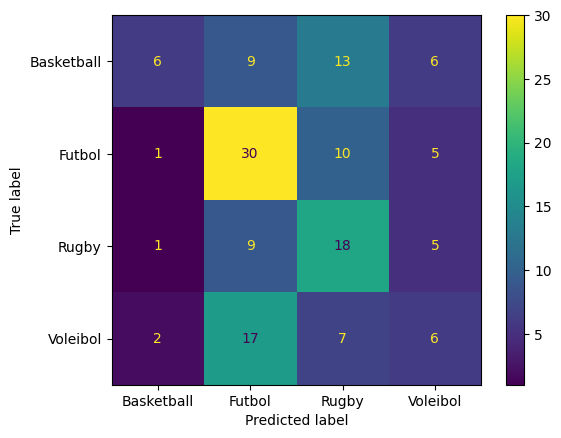

In [9]:
y_pred = lda.predict(test_X)
print(classification_report(test_y, y_pred, digits=3))
ConfusionMatrixDisplay.from_predictions(test_y, y_pred)

## Comparación RapidMiner  
Procedemos a implementar el mismo proceso en RapidMiner para ver como se comparan los modelos que construyen.  
![Pelican](./images/image.png)  
![Pelican](./images/image-1.png)  

## Predicción  
Ahora que tenemos el modelo entrenado y validado, podemos pasar a predecir para el set de scoring.  
Para esto re-entrenamos el set con todos los datos de train que disponemos (tras limpieza), para asegurar el mejor performance posible.


In [22]:
lda2 = LinearDiscriminantAnalysis()
lda2 = lda2.fit(dfCleanTrain[['Edad','Fuerza','Velocidad','Lesiones','Vision','Resistencia','Agilidad','CapacidadDecision']].values, dfCleanTrain['DeportePrimario'].values)

scoringPred = lda.predict(dfCleanScoring)

C:\Users\gatom\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearDiscriminantAnalysis was fitted without feature names
  warnings.warn(


In [34]:
#Vemos los primeros 15 resultados de ejemplo
print(scoringPred[:16])

print("Predicciones Futbol:",np.count_nonzero(scoringPred == 'Futbol'))
print("Predicciones Voleibol:",np.count_nonzero(scoringPred == 'Voleibol'))
print("Predicciones Basketball:",np.count_nonzero(scoringPred == 'Basketball'))
print("Predicciones Rugby:",np.count_nonzero(scoringPred == 'Rugby'))

['Voleibol' 'Rugby' 'Futbol' 'Rugby' 'Rugby' 'Rugby' 'Futbol' 'Rugby'
 'Futbol' 'Voleibol' 'Futbol' 'Rugby' 'Futbol' 'Futbol' 'Basketball'
 'Voleibol']
Predicciones Futbol: 772
Predicciones Voleibol: 366
Predicciones Basketball: 139
Predicciones Rugby: 490


En RapidMiner resulta:  
![Pelican](./images/image-2.png)  
![Pelican](./images/image-3.png)  
![Pelican](./images/image-4.png)  

# Conclusiones    
- A pesar de no tener resultados excelentes, la precisión obtenida (~40%) es sustancialmente mejor que simplemente adivinar (que tendría un 25% probabilidad de acierto)  
- En comparación a RapidMiner, SKLearn predice mejor deportes como voleibol y rugby, dándole una precisión general mayor.  
- En la aplicación de modelo, ambos dan resultados diferentes. 
- Como es esperado, el modelo de RapidMiner favorece las predicciones a fútbol, mientras que en SKLearn es más balanceado.